In [40]:
from lxml import html
import requests
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt

### Load Data

##### Andy Data 

In [144]:
andy = pd.read_csv('3700_nodupes.csv')

In [146]:
andy.keys()

Index([u'Unnamed: 0', u'Title', u'studio', u'TotalGross', u'Theatres',
       u'Opening', u'OpenDate', u'OpenMonth', u'OpenDay', u'Cast3',
       u'Released', u'Cast2', u'Cast1', u'Cast0', u'Writer', u'Director',
       u'ID', u'imdbID', u'Year', u'Rating', u'Runtime', u'Genre', u'Cast',
       u'Metacritic', u'imdbRating', u'imdbVotes', u'Poster', u'Plot',
       u'FullPlot', u'Language', u'Country', u'Awards', u'lastUpdated',
       u'Nominations', u'avg_imdbRating_Director', u'avg_imdbRating_Writer',
       u'avg_imdbRating_Cast0', u'avg_imdbRating_Cast1',
       u'avg_imdbRating_Cast2', u'avg_imdbRating_Cast3', u'datetime',
       u'AdjTotalGross', u'AdjOpening', u'LogTotalGross', u'LogTheatres',
       u'LogOpening'],
      dtype='object')

In [170]:
andydf = pd.DataFrame([andy.imdbRating,andy.Title,andy.TotalGross,andy.Cast,andy.Director,andy.Awards,andy.Released,andy.OpenDate,andy.Theatres,andy.imdbVotes,andy.Genre])

In [171]:
andydf = andydf.T

In [222]:
andydf.groupby("Director")

In [450]:
andy[["Title", "Genre"]]

,Title,Genre
0,Man of the House,"Action, Comedy"
1,Assassins,Adult
2,Circle of Friends,"Drama, Mystery, Thriller"
3,Home for the Holidays,"Drama, Family"
4,Jack,Drama
5,Black Sheep,"Action, Adventure"
6,Black Sheep,"Comedy, Horror, Sci-Fi"
7,Eye for an Eye,"Action, Crime"
8,Chain Reaction,Horror
9,Hercules,"Action, Adventure"


In [209]:
res = andy.corr(method='pearson').unstack().reset_index()
res.columns=["l1","l2","Corr"]
nres = res.sort_values(by='Corr',ascending=False)
nres[(nres.Corr < 1) & (nres.Corr > .4) & (nres.l1 == "imdbRating") ]

,l1,l2,Corr
215,imdbRating,Metacritic,0.719698


In [212]:
res[(res.Corr < 1) & (res.Corr > .5) & (res.l1 == "Theatres") ]

,l1,l2,Corr
47,Theatres,TotalGross,0.706666
49,Theatres,Opening,0.706642
56,Theatres,imdbVotes,0.545210
64,Theatres,AdjTotalGross,0.706666
65,Theatres,AdjOpening,0.706642
66,Theatres,LogTotalGross,0.874328
67,Theatres,LogTheatres,0.866047
68,Theatres,LogOpening,0.915982


In [224]:
res[(res.Corr < -.5) & (res.Corr > -1) & (res.l1 != "Unnamed: 0")].sort_values(by="Corr")


,l1,l2,Corr
460,LogTotalGross,Unnamed: 0,-0.947338
483,LogTheatres,Unnamed: 0,-0.894478
506,LogOpening,Unnamed: 0,-0.875203
46,Theatres,Unnamed: 0,-0.822652
414,AdjTotalGross,Unnamed: 0,-0.554455
23,TotalGross,Unnamed: 0,-0.554455
69,Opening,Unnamed: 0,-0.524158
437,AdjOpening,Unnamed: 0,-0.524158


In [227]:
# {"Title": andy.Title, "Studio": andy.studio, "Cast0": andy.Cast0, "imdbRating": andy.imdbRating, "OpenDate":}

,Unnamed: 0,Title,studio,TotalGross,Theatres,Opening,OpenDate,OpenMonth,OpenDay,Cast3,...,avg_imdbRating_Cast0,avg_imdbRating_Cast1,avg_imdbRating_Cast2,avg_imdbRating_Cast3,datetime,AdjTotalGross,AdjOpening,LogTotalGross,LogTheatres,LogOpening
0,1,Man of the House,Sony,19699706,2422,8917251,2/25,2,25,Paula Garcé,...,-1.000000,5.600000,-1.000,-1.000000,2005-01-01,196997.06,89172.51,12.190944,7.792349,11.398328
1,2,Assassins,WB,30303072,2343,9378637,10/6,10,6,Bibi Jone,...,6.300000,6.150000,5.200,-1.000000,2011-01-01,303030.72,93786.37,12.621589,7.759187,11.448775
2,3,Circle of Friends,Sav.,23389975,902,125587,3/17,3,17,Paula Costai,...,4.850000,-1.000000,-1.000,-1.000000,2006-01-01,233899.75,1255.87,12.362648,6.804615,7.135584
3,4,Home for the Holidays,Par.,17519169,1000,4007717,11/3,11,3,John Nova,...,-1.000000,-1.000000,5.600,-1.000000,2005-01-01,175191.69,40077.17,12.073636,6.907755,10.598562
4,5,Jack,BV,58620973,2232,11191496,8/9,8,9,Erich Anderso,...,-1.000000,-1.000000,-1.000,-1.000000,2004-01-01,586209.73,111914.96,13.281433,7.710653,11.625495
5,6,Black Sheep,Par.,32417995,2092,10593609,2/2,2,2,José Luis Córdob,...,-1.000000,-1.000000,-1.000,-1.000000,2009-01-01,324179.95,105936.09,12.689054,7.645876,11.570591
6,7,Black Sheep,Par.,32417995,2092,10593609,2/2,2,2,Tammy Davi,...,-1.000000,-1.000000,-1.000,-1.000000,2006-01-01,324179.95,105936.09,12.689054,7.645876,11.570591
7,8,Eye for an Eye,Par.,26877589,1680,6968044,1/12,1,12,Byung-joon Le,...,-1.000000,-1.000000,-1.000,-1.000000,2008-01-01,268775.89,69680.44,12.501633,7.426549,11.151675
8,9,Chain Reaction,Fox,21226204,2256,7545944,8/2,8,2,Luca Mari,...,-1.000000,-1.000000,-1.000,-1.000000,2006-01-01,212262.04,75459.44,12.265577,7.721349,11.231351
9,10,Hercules,BV,99112101,2930,249567,6/15,6,15,Rufus Sewel,...,6.050000,6.000000,6.150,7.600000,2014-01-01,991121.01,2495.67,13.806592,7.982758,7.822313


,Unnamed: 0,TotalGross,Theatres,Opening,OpenMonth,OpenDay,ID,Year,Metacritic,imdbRating,...,avg_imdbRating_Writer,avg_imdbRating_Cast0,avg_imdbRating_Cast1,avg_imdbRating_Cast2,avg_imdbRating_Cast3,AdjTotalGross,AdjOpening,LogTotalGross,LogTheatres,LogOpening
Unnamed: 0,1.000000,-0.554455,-0.822652,-0.524158,-0.057134,-0.040908,0.243654,0.162377,0.056140,-0.053700,...,-0.077406,-0.193679,-0.111849,-0.084026,-0.105292,-0.554455,-0.524158,-0.947338,-0.894478,-0.875203
TotalGross,-0.554455,1.000000,0.706666,0.918189,0.058030,0.006373,-0.082950,0.039063,0.055941,0.126415,...,0.122111,0.218086,0.140132,0.142432,0.153577,1.000000,0.918189,0.631304,0.520614,0.616315
Theatres,-0.822652,0.706666,1.000000,0.706642,0.018760,0.021845,-0.126918,0.025456,-0.219467,-0.072981,...,0.124602,0.273649,0.188505,0.172113,0.182986,0.706666,0.706642,0.874328,0.866047,0.915982
Opening,-0.524158,0.918189,0.706642,1.000000,-0.016502,-0.010453,-0.070006,0.053432,-0.024808,0.057387,...,0.134511,0.210705,0.136574,0.150570,0.152581,0.918189,1.000000,0.599345,0.508206,0.644936
OpenMonth,-0.057134,0.058030,0.018760,-0.016502,1.000000,-0.038211,0.008884,-0.008042,0.120286,0.106202,...,0.050755,0.055548,0.035021,0.040058,0.028517,0.058030,-0.016502,0.055983,0.049047,-0.006081
OpenDay,-0.040908,0.006373,0.021845,-0.010453,-0.038211,1.000000,0.004983,-0.005047,0.013099,0.025699,...,0.022967,0.016665,0.004633,-0.002632,0.014649,0.006373,-0.010453,0.043679,0.030825,0.024207
ID,0.243654,-0.082950,-0.126918,-0.070006,0.008884,0.004983,1.000000,0.858842,0.093851,0.009844,...,0.217998,0.141722,0.142352,0.124939,0.120907,-0.082950,-0.070006,-0.138440,-0.107648,-0.128664
Year,0.162377,0.039063,0.025456,0.053432,-0.008042,-0.005047,0.858842,1.000000,0.043115,0.008295,...,0.276009,0.286276,0.268682,0.253628,0.221813,0.039063,0.053432,-0.011121,0.024620,0.009708
Metacritic,0.056140,0.055941,-0.219467,-0.024808,0.120286,0.013099,0.093851,0.043115,1.000000,0.719698,...,0.070782,-0.075094,-0.104841,-0.078058,-0.077737,0.055941,-0.024808,-0.048182,-0.198006,-0.244171
imdbRating,-0.053700,0.126415,-0.072981,0.057387,0.106202,0.025699,0.009844,0.008295,0.719698,1.000000,...,0.067148,0.030956,-0.013258,-0.008545,0.005462,0.126415,0.057387,0.063374,-0.064707,-0.095607


##### IMDB Data

##### Numbers Data:

In [259]:
url = 'http://www.the-numbers.com/movie/budgets/all'
page = html.fromstring(requests.get(url).text)
df = pd.read_html(html.tostring(page.cssselect('table')[0]),header=0)[0]

In [260]:
df["Production Budget"] = df["Production Budget"].str.replace('$','').str.replace(',','')
df["Production Budget"] = pd.to_numeric(df["Production Budget"], errors='ignore')

df["Domestic Gross"] = df["Domestic Gross"].str.replace('$','').str.replace(',','')
df["Domestic Gross"] = pd.to_numeric(df["Domestic Gross"], errors='ignore')

df['Release Date'] = pd.to_datetime(df['Release Date'])

In [423]:
## production budget relates to domestic Gross  with a p value of 0.671922
## normalize for CPI

df.to_pickle('budget.pkl')

(array([  1.19900000e+03,   5.51000000e+02,   4.37000000e+02,
          4.07000000e+02,   3.52000000e+02,   2.63000000e+02,
          1.31000000e+02,   2.18000000e+02,   1.76000000e+02,
          1.87000000e+02,   8.80000000e+01,   1.43000000e+02,
          8.70000000e+01,   2.20000000e+01,   1.13000000e+02,
          6.70000000e+01,   5.90000000e+01,   5.40000000e+01,
          8.10000000e+01,   4.70000000e+01,   5.00000000e+00,
          4.40000000e+01,   1.70000000e+01,   4.60000000e+01,
          9.00000000e+00,   2.60000000e+01,   2.00000000e+00,
          8.00000000e+00,   1.70000000e+01,   2.10000000e+01,
          1.60000000e+01,   1.00000000e+01,   1.60000000e+01,
          1.00000000e+00,   7.00000000e+00,   3.60000000e+01,
          3.00000000e+00,   9.00000000e+00,   6.00000000e+00,
          9.00000000e+00,   0.00000000e+00,   1.10000000e+01,
          7.00000000e+00,   4.00000000e+00,   7.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.80000000e+01,
        

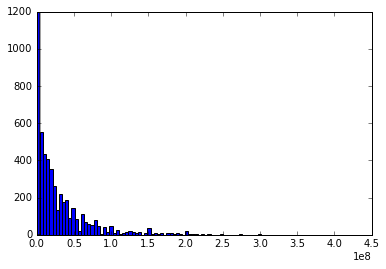

In [411]:
plt.hist(df['Production Budget'],bins=100)

KeyError: 'Normalized_Production_Budget'

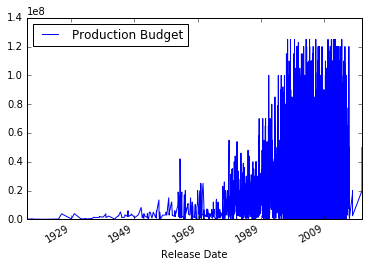

In [369]:
df.plot(x='Release Date',y='Production Budget')
df.head()
# df["Normalized_Domestic_Gross"] = df["Domestic Gross"]/## looked up correctly unstacked_cpi_df.cpi2015
### turn release date into a month year datetime, then do a merge with the lookuptable to get the cpi values
### then divide moneyz by cpis in column
# ts = pd.to_datetime(str(date)) 
# d = ts.strftime('%Y.%m.%d')
t = pd.to_datetime(df["Release Date"])
d = t.apply(lambda date: date.strftime('%Y-%m-1'))
df["cpi_date"] = pd.to_datetime(d)
# df["cpi_date"] = d
#     type(df.cpi_date.values[0])
#     type(unstacked_cpi_df.Date.values[0])
# unstacked_cpi_df.head()
# df.head()
# set(unstacked_cpi_df.Date.values) & set(df.cpi_date.values)
# df.cpi_date.values
# ndf = df.set_index(df["Release Date"])
# ndf.resample('M',how='')
# type(df["Release Date"])
new_df = pd.merge(df,unstacked_cpi_df,left_on='cpi_date', right_on='Date').drop({'pct_change','Dif','cpi','cpi_date'},axis=1)
new_df["Normalized_Production_Budget"] = new_df["Production Budget"]/new_df["cpi2015"]
new_df["Normalized_Domestic_Gross"] = new_df["Domestic Gross"]/new_df["cpi2015"]
new_df.head()
df.plot(x='Release Date',y='Normalized_Production_Budget')

In [385]:
new_df.head()

,Unnamed: 0,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Date,cpi2015,Normalized_Production_Budget,Normalized_Domestic_Gross
0,1,2009-12-18,Avatar,425000000,760507625,"$2,783,918,982",2009-12-01,0.913007,4.654947e+08,8.329701e+08
1,333,2009-12-11,The Lovely Bones,95000000,44028238,"$94,808,454",2009-12-01,0.913007,1.040518e+08,4.822333e+07
2,350,2009-12-25,Sherlock Holmes,90000000,209028679,"$498,438,212",2009-12-01,0.913007,9.857536e+07,2.289453e+08
3,401,2009-12-25,It's Complicated,85000000,112735375,"$224,614,744",2009-12-01,0.913007,9.309895e+07,1.234770e+08
4,494,2009-12-18,Nine,80000000,19676965,"$53,508,858",2009-12-01,0.913007,8.762254e+07,2.155182e+07


In [414]:
new_df.corr()

,Unnamed: 0,Production Budget,Domestic Gross,cpi2015,Normalized_Production_Budget,Normalized_Domestic_Gross,prod_bud_squared
Unnamed: 0,1.000000,-0.794798,-0.560711,0.025258,-0.819029,-0.517090,-0.491008
Production Budget,-0.794798,1.000000,0.691781,0.089648,0.978718,0.599569,0.889385
Domestic Gross,-0.560711,0.691781,1.000000,-0.022998,0.689337,0.958214,0.628718
cpi2015,0.025258,0.089648,-0.022998,1.000000,-0.050585,-0.177312,0.120524
Normalized_Production_Budget,-0.819029,0.978718,0.689337,-0.050585,1.000000,0.633259,0.839787
Normalized_Domestic_Gross,-0.517090,0.599569,0.958214,-0.177312,0.633259,1.000000,0.526406
prod_bud_squared,-0.491008,0.889385,0.628718,0.120524,0.839787,0.526406,1.000000


In [412]:
from sklearn.linear_model import LinearRegression

rgr = LinearRegression()
rgr.fit(new_df[['Normalized_Production_Budget']].values, new_df['Normalized_Domestic_Gross'])
pred = rgr.predict(new_df[['Normalized_Production_Budget']].values)
print sum((pred - new_df['Normalized_Domestic_Gross'])**2)

# rgr = LinearRegression()
# rgr.fit(new_df[['Production Budget']].values, new_df['cpi2015'])
# pred = rgr.predict(new_df[['Production Budget']].values)
# print sum((pred - new_df['cpi2015'])**2)

# rgr = LinearRegression()
# rgr.fit(new_df[['Production Budget', 'prod_bud_squared']].values, new_df['cpi2015'])
# pred = rgr.predict(new_df[['Production Budget', 'prod_bud_squared']].values)
# print sum((pred - new_df['cpi2015'])**2)

# rgr = LinearRegression()
# rgr.fit(new_df[['Production Budget', 'Domestic Gross']].values, new_df['cpi2015'])
# pred = rgr.predict(new_df[['Production Budget', 'Domestic Gross']].values)
# print sum((pred - new_df['cpi2015'])**2)

1.99583766971e+19
107.504623989
106.64176767
106.00243885


In [394]:
new_df['prod_bud_squared'] = np.array(new_df['Production Budget'])**2

In [389]:
rgr.coef_

array([  7.67718549e-10,  -3.78311145e-10])

In [388]:
pred = rgr.predict(new_df[['Production Budget', 'Domestic Gross']].values)

In [390]:
sum((pred - new_df['cpi2015'])**2)

106.00243885039411

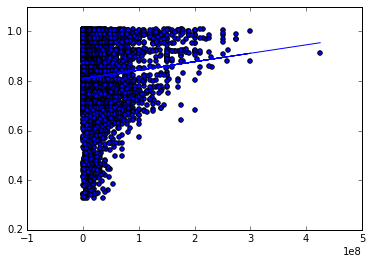

In [375]:
plt.scatter(new_df['Production Budget'], new_df['cpi2015'])
plt.plot(new_df['Production Budget'], pred)

1.99583766971e+19


,Unnamed: 0,Production Budget,Domestic Gross,cpi2015,Normalized_Production_Budget,Normalized_Domestic_Gross,prod_bud_squared
Unnamed: 0,1.000000,-0.794798,-0.560711,0.025258,-0.819029,-0.517090,-0.491008
Production Budget,-0.794798,1.000000,0.691781,0.089648,0.978718,0.599569,0.889385
Domestic Gross,-0.560711,0.691781,1.000000,-0.022998,0.689337,0.958214,0.628718
cpi2015,0.025258,0.089648,-0.022998,1.000000,-0.050585,-0.177312,0.120524
Normalized_Production_Budget,-0.819029,0.978718,0.689337,-0.050585,1.000000,0.633259,0.839787
Normalized_Domestic_Gross,-0.517090,0.599569,0.958214,-0.177312,0.633259,1.000000,0.526406
prod_bud_squared,-0.491008,0.889385,0.628718,0.120524,0.839787,0.526406,1.000000


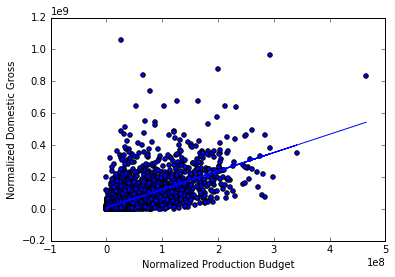

In [451]:

rgr = LinearRegression()
rgr.fit(new_df[['Normalized_Production_Budget']].values, new_df['Normalized_Domestic_Gross'])
pred = rgr.predict(new_df[['Normalized_Production_Budget']].values)
print sum((pred - new_df['Normalized_Domestic_Gross'])**2)

plt.scatter(new_df['Normalized_Production_Budget'], new_df['Normalized_Domestic_Gross'])
subset = new_df[np.log(np.array(new_df['Normalized_Production_Budget'])) < (.4*10**9)]
pred_subset = pred[np.log(np.array(new_df['Normalized_Production_Budget'])) < (.4*10**9)]
# plt.plot(new_df['Normalized_Production_Budget'], pred)
plt.ylabel('Normalized Domestic Gross')
plt.xlabel('Normalized Production Budget')
plt.plot(new_df.Normalized_Production_Budget, pred)
# plt.plot(subset.Normalized_Production_Budget, pred_subset)
# new_df.corr()
# # subset
# rgr.coef_
# rgr.predict()
new_df.corr()
# 0.633259

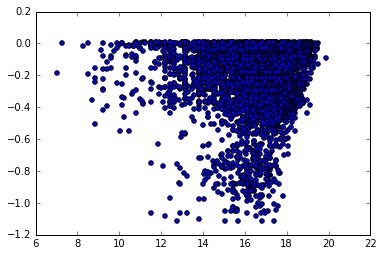

In [382]:
import numpy as np
plt.scatter(np.log(np.array(new_df['Production Budget'])), np.log(np.array(new_df['cpi2015'])))
plt.scatter(np.log(np.array(new_df['Production Budget'])), np.log(np.array(new_df['cpi2015'])))

In [436]:
new_df[np.log(np.array(new_df['cpi2015'])) < -0.6].sort_values(by="Release Date")

,Unnamed: 0,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Date,cpi2015,Normalized_Production_Budget,Normalized_Domestic_Gross,prod_bud_squared
4481,4824,1980-01-01,Maniac,350000,10000000,"$10,000,000",1980-01-01,0.328929,1.064058e+06,3.040167e+07,122500000000
4480,3991,1980-01-01,Terror Train,3500000,8000000,"$8,000,000",1980-01-01,0.328929,1.064058e+07,2.432134e+07,12250000000000
4479,3547,1980-01-01,Dressed to Kill,6500000,31899000,"$31,899,000",1980-01-01,0.328929,1.976109e+07,9.697829e+07,42250000000000
4478,2314,1980-01-01,Can't Stop the Music,20000000,2000000,"$2,000,000",1980-01-01,0.328929,6.080334e+07,6.080334e+06,400000000000000
4477,1505,1980-01-01,Lion of the Desert,35000000,1500000,"$1,500,000",1980-01-01,0.328929,1.064058e+08,4.560251e+06,1225000000000000
4767,4538,1980-02-01,The Fog,1000000,21378361,"$21,378,361",1980-02-01,0.333580,2.997782e+06,6.408767e+07,1000000000000
4657,2607,1980-03-07,Coal Miner's Daughter,15000000,67182787,"$67,182,787",1980-03-01,0.338653,4.429307e+07,1.983821e+08,225000000000000
4658,4907,1980-03-21,Mad Max,200000,8750000,"$99,750,000",1980-03-01,0.338653,5.905743e+05,2.583762e+07,40000000000
4611,4725,1980-05-09,Friday the 13th,550000,39754601,"$59,754,601",1980-05-01,0.345841,1.590327e+06,1.149506e+08,302500000000
4613,4976,1980-05-10,Penitentiary,100000,287000,"$287,000",1980-05-01,0.345841,2.891504e+05,8.298616e+05,10000000000


In [431]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
clf = linear_model.Ridge(alpha = .5)
clf.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
clf.coef_
# clf.predict(x)

array([ 0.34545455,  0.34545455])

In [428]:
clf.intercept_ 

0.13636363636363638

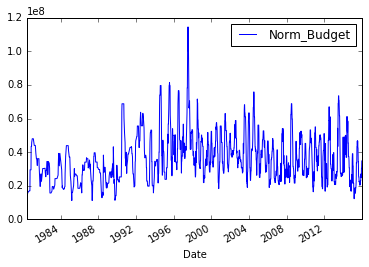

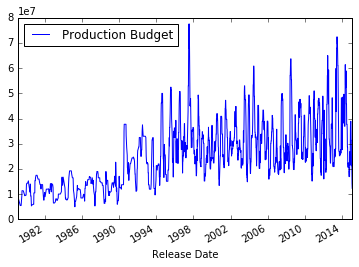

In [410]:
nbts = pd.Series(data=new_df["Normalized_Production_Budget"].values,index=new_df['Release Date']).reset_index(0)
nbts.columns=["Date","Norm_Budget"]
nbts_t = nbts.sort_values(by="Date")
# nbts_t.Date = pd.to_datetime(nbts_t)
nbts_t = nbts_t.set_index('Date')

resampled_norm_budget_data = nbts_t.resample('7D',how='mean').dropna()
pd.rolling_median(resampled_norm_budget_data,10).dropna().plot()
test = pd.rolling_median(resampled_budget_data,10).dropna()
# test[test["Release Date"] > datetime()].plot()
# test.plot()
test[190:1600].plot()
# rnmean = pd.rolling_mean(resampled_norm_budget_data,10).dropna()
# pd.rolling_median(resampled_norm_budget_data,10).dropna().plot()
# df_b = pd.DataFrame(bts).reset_index()
# test.head()
# df_b = df_b.sort_values(by='Release Date')
# ndf_b = df_b.set_index('Release Date')

In [355]:
type(nbts_t)

pandas.core.frame.DataFrame

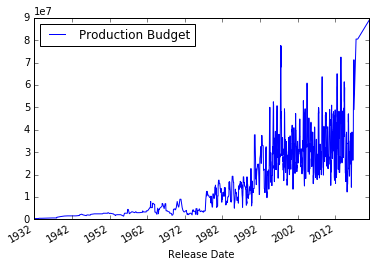

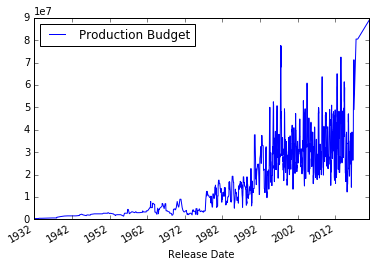

In [401]:
resampled_budget_data = ndf_b.resample('7D',how='mean').dropna()

pd.rolling_median(resampled_budget_data,10).dropna().plot()
rmean = pd.rolling_mean(resampled_budget_data,10).dropna()
pd.rolling_median(resampled_budget_data,10).dropna().plot()

##### Box Office Mojo Data: 

In [277]:
with open("oscars.pkl", 'r') as picklefile: 
    oscars = pickle.load(picklefile)
with open("processedMojo.pkl", 'r') as picklefile: 
    processed_mojo = pickle.load(picklefile)
oscars.columns = ["YrRank","Title","Studio","Box_Office","Noms","Wins","Year"] 
oscars["Box_Office"] = oscars["Box_Office"].str.replace('$','').str.replace(',','')
oscars["Box_Office"] = pd.to_numeric(oscars["Box_Office"], errors='ignore')
# oscars["Box_Office"] = oscars["Box_Office"].str.replace('$','').str.replace(',','')
oscars["Wins"] = pd.to_numeric(oscars["Wins"], errors='ignore')
oscars["Noms"] = pd.to_numeric(oscars["Noms"], errors='ignore')
oscars["YrRank"] = pd.to_numeric(oscars["YrRank"], errors='ignore')
# oscars["Year"] = pd.to_datetime(oscars["Year"], errors='ignore')

In [276]:
oscars.corr()

,YrRank,Box_Office,Noms,Wins,Year
YrRank,1.000000,-0.552394,-0.349992,-0.242708,0.280993
Box_Office,-0.552394,1.000000,0.268901,0.255952,0.139464
Noms,-0.349992,0.268901,1.000000,0.713882,-0.053645
Wins,-0.242708,0.255952,0.713882,1.000000,-0.056076
Year,0.280993,0.139464,-0.053645,-0.056076,1.000000


In [236]:
p_osc = pd.merge(oscars,processed_mojo,on="Title").drop("Studio_y",axis=1).drop("Year_y",axis=1)

In [243]:
budget_oscars = pd.merge(df,oscars, left_on="Movie",right_on = "Title")

In [321]:
budget_oscars.head()

,Unnamed: 0,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,YrRank,Title,Studio,Box_Office,Noms,Wins,Year
0,1,2009-12-18,Avatar,425000000,"$760,507,625","$2,783,918,982",1,Avatar,Fox,"$749,766,139",9,3,2009
1,2,2007-05-24,Pirates of the Caribbean: At World's End,300000000,"$309,420,425","$963,420,425",4,Pirates of the Caribbean: At World's End,BV,"$309,420,425",2,0,2007
2,3,2015-11-06,Spectre,300000000,"$199,285,272","$877,485,272",10,Spectre,Sony,"$199,151,327",1,0,2015
3,5,2013-07-02,The Lone Ranger,275000000,"$89,289,910","$259,989,910",40,The Lone Ranger,BV,"$89,302,115",2,0,2013
4,7,2010-11-24,Tangled,260000000,"$200,821,936","$586,581,936",10,Tangled,BV,"$200,821,936",1,0,2010


In [240]:
p_osc.corr()
### YrRank and Total_gross negatively correlated


,YrRank,Noms,Wins,Year_x,Gross_no_Theaters,Opening,Opening_no_Theaters,Total_Gross
YrRank,1.000000,-0.348733,-0.242326,0.282302,-0.690761,-0.394951,-0.522277,-0.552181
Noms,-0.348733,1.000000,0.713802,-0.050797,0.185152,0.028389,-0.004967,0.268854
Wins,-0.242326,0.713802,1.000000,-0.055095,0.131812,0.027457,0.000976,0.255781
Year_x,0.282302,-0.050797,-0.055095,1.000000,0.222167,0.231920,0.179739,0.137820
Gross_no_Theaters,-0.690761,0.185152,0.131812,0.222167,1.000000,0.723546,0.872716,0.765788
Opening,-0.394951,0.028389,0.027457,0.231920,0.723546,1.000000,0.796219,0.844633
Opening_no_Theaters,-0.522277,-0.004967,0.000976,0.179739,0.872716,0.796219,1.000000,0.696591
Total_Gross,-0.552181,0.268854,0.255781,0.137820,0.765788,0.844633,0.696591,1.000000


In [234]:
oscars.head()
oscars["Box_Office"] = oscars.Box_Office

,YrRank,Title,Studio,Box_Office,Noms,Wins,Year
0,11,Ordinary People,Par.,"$54,766,923",7,4,1980
1,33,Tess,Col.,"$20,093,330",6,3,1980
2,27,Raging Bull,MGM,"$23,334,953",8,2,1980
3,32,Fame (1980),MGM,"$21,202,829",6,2,1980
4,86,Melvin and Howard,Uni.,"$4,309,490",3,2,1980


In [283]:
processed_mojo.head(n=100)

,Gross_no_Theaters,Opening,Opening_no_Theaters,Rank,Studio,Title,Total_Gross,Year,Close,Open
1,3876,114844116,3615,1,Sony,Spider-Man,403706375,2002,2002-05-03,2002-05-03
2,3622,62007528,3622,2,NL,The Lord of the Rings: The Two Towers,339789881,2002,2002-12-18,2002-12-18
3,3161,80027814,3161,3,Fox,Star Wars: Episode II - Attack of the Clones,302191252,2002,2002-05-16,2002-05-16
4,3682,88357488,3682,4,WB,Harry Potter and the Chamber of Secrets,261988482,2002,2002-11-15,2002-11-15
5,2016,597362,108,5,IFC,My Big Fat Greek Wedding,241438208,2002,2002-04-19,2002-04-19
6,3453,60117080,3264,6,BV,Signs,227966634,2002,2002-08-02,2002-08-02
7,3613,73071188,3613,7,NL,Austin Powers in Goldmember,213307889,2002,2002-07-26,2002-07-26
8,3641,52148751,3557,8,Sony,Men in Black II,190418803,2002,2002-07-03,2002-07-03
9,3345,46312454,3316,9,Fox,Ice Age,176387405,2002,2002-03-15,2002-03-15
10,2701,2074929,77,10,Mira.,Chicago,170687518,2002,2002-12-27,2002-12-27


##### CPI Data: http://data.bls.gov/pdq/SurveyOutputServlet 


In [118]:
cpi_excel = open('SeriesReport.xlsx','r')
cpidf = pd.read_excel(cpi_excel,header=9).set_index('Year')
cpi = cpidf.drop({'HALF1','HALF2'},axis=1)

In [119]:
unstacked_cpi = cpi.unstack()
unstacked_cpi.reset_index()
unstacked_cpi_df = pd.DataFrame(unstacked_cpi).reset_index()
unstacked_cpi_df.columns = ['month', 'year','cpi']

In [134]:
unstacked_cpi_df["Date"] = "1/" + unstacked_cpi_df.month.map(str) + "/" + unstacked_cpi_df.year.map(str)
unstacked_cpi_df["Date"] = pd.to_datetime(unstacked_cpi_df.Date)
unstacked_cpi_df = unstacked_cpi_df.drop("month",axis=1).drop('year',axis=1)

In [255]:
unstacked_cpi_df.head()

,cpi,Date,Dif,pct_change
0,77.8,1980-01-01,NaN,NaN
1,87.0,1981-01-01,0.118252,0.118252
2,94.3,1982-01-01,0.083908,0.083908
3,97.8,1983-01-01,0.037116,0.037116
4,101.9,1984-01-01,0.041922,0.041922


In [253]:
unstacked_cpi_df["Dif"] = (unstacked_cpi_df.cpi / unstacked_cpi_df.cpi.shift()) - 1
unstacked_cpi_df["pct_change"] = unstacked_cpi_df.cpi.pct_change()

In [286]:
unstacked_cpi_df.sort_values(by='Date')
unstacked_cpi_df["cpi2015"] = unstacked_cpi_df.cpi/unstacked_cpi_df.cpi.values[431]

In [287]:
unstacked_cpi_df.cpi2015

,cpi,Date,Dif,pct_change,cpi2015
0,77.800,1980-01-01,NaN,NaN,0.328929
1,87.000,1981-01-01,0.118252,0.118252,0.367826
2,94.300,1982-01-01,0.083908,0.083908,0.398689
3,97.800,1983-01-01,0.037116,0.037116,0.413487
4,101.900,1984-01-01,0.041922,0.041922,0.430821
5,105.500,1985-01-01,0.035329,0.035329,0.446042
6,109.600,1986-01-01,0.038863,0.038863,0.463376
7,111.200,1987-01-01,0.014599,0.014599,0.470141
8,115.700,1988-01-01,0.040468,0.040468,0.489166
9,121.100,1989-01-01,0.046672,0.046672,0.511997


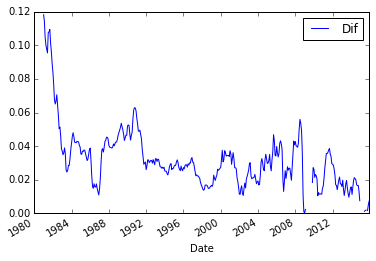

In [438]:
unstacked_cpi_df[unstacked_cpi_df > 0].plot(x='Date',y='Dif')

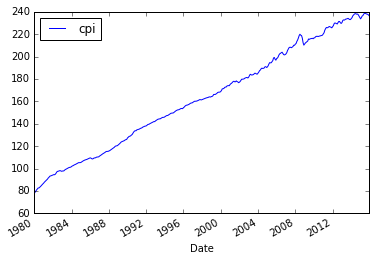

In [137]:
unstacked_cpi_df.plot(x='Date',y='cpi')